# Task

In [22]:
import pandas as pd
from utils import expand_dataset
import numpy as np

from utils.algorithm import score_plot_and_get_best
from utils.algorithm import add_new_column

In [23]:
df_business = pd.read_csv('../dataset/df_business_final.csv')

In [24]:
print(df_business.shape)
df_business.head(5)

(150346, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,MO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def filter_by_city(city, df):
    return df[df['city'].str.contains(city) == True]

In [26]:
df_business_filtered = filter_by_city('Tucson', df_business)

In [27]:
print(df_business_filtered.shape)

df_business_filtered.head(5)

(9262, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Drop non number features

In [28]:
to_drop = ['business_id', 'address', 'categories', 'city', 'latitude', 'longitude', 'name', 'state', 'postal_code']

df_business_filtered_dropped = df_business_filtered.drop(to_drop, axis=1)

In [29]:
df_business_filtered_dropped.shape

(9262, 57)

# K-Means

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [62]:
df_business_dropped_kmeans = df_business_filtered_dropped.copy()

            silhouette_score  calinski_harabasz_score  davies_bouldin_score
n_clusters                                                                 
2                   0.885914             14487.306274              0.461312
3                   0.830901             16650.392603              0.522023
4                   0.803520             20308.513279              0.498262
5                   0.739923             23398.586022              0.502726
6                   0.734260             29066.154269              0.486664
7                   0.678362             32001.073471              0.503381
8                   0.678475             35737.176352              0.510760
9                   0.638457             40034.711332              0.514311
10                  0.638386             44541.292415              0.461663
11                  0.602434             48480.469921              0.472774
12                  0.623239             54404.755091              0.460817
13          

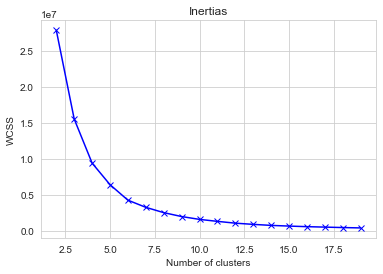

In [63]:
df_cluster_kmeans = score_plot_and_get_best(df_business_dropped_kmeans, "kmeans", np.arange(2, 20))

In [64]:
df_business_merged_dropped_kmeans = add_new_column('kmeans', df_cluster_kmeans, df_business_dropped_kmeans)
df_business_merged_dropped_kmeans.shape

(9262, 58)

### Reset index

In [65]:
df_business_merged_dropped_kmeans = df_business_merged_dropped_kmeans.reset_index(drop=True)
df_business_filtered = df_business_filtered.reset_index(drop=True)

### Re-integrate dropped features

In [66]:
df_business_filtered_dropped_merged_kmeans = df_business_merged_dropped_kmeans.join(df_business_filtered[to_drop])
print(df_business_filtered_dropped_merged_kmeans.shape)
df_business_filtered_dropped_merged_kmeans.head(5)

(9262, 67)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,cluster,business_id,address,categories,city,latitude,longitude,name,state,postal_code
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,tUFrWirKiKi_TAnsVWINQQ,5255 E Broadway Blvd,"Department Stores, Shopping, Fashion, Home & G...",Tucson,32.223236,-110.880452,Target,AZ,85711
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,rBmpy_Y1UbBx8ggHlyb7hA,625 N Stone Ave,"Automotive, Auto Parts & Supplies, Auto Custom...",Tucson,32.229872,-110.972342,Arizona Truck Outfitters,AZ,85705
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,wghnIlMb_i5U46HMBGx9ig,"1625 W Valencia Rd, Ste 101-103","Restaurants, Chinese",Tucson,32.132305,-110.999985,China Dragon Restaurant,AZ,85746
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,txyXRytGjwOXvS8s4sc-WA,1070 E Tucson Marketplace Blvd,"Vitamins & Supplements, Ice Cream & Frozen Yog...",Tucson,32.186794,-110.954765,Smoothie King,AZ,85713
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,eYxGFkxo6m3SYGVTh5m2nQ,4158 E Grant Rd,"Towing, Hotels & Travel, Automotive, Motorcycl...",Tucson,32.250324,-110.903655,Big Boyz Toyz Motorcycle Rentals,AZ,85712


### Export clustered with kmeans df

In [67]:
df_business_filtered_dropped_merged_kmeans.to_csv(
    r'/Users/at181903/PycharmProjects/IAproject/dataset/df_business_filtered_by_city_kmeans.csv', index=False)

# DB Scan algorithm

In [37]:
from utils.algorithm import get_distances_and_plot
from utils.algorithm import remove_duplicates
from utils.algorithm import filter_distances_and_plot

In [50]:
df_business_dropped_dbscan = df_business_filtered_dropped.copy()

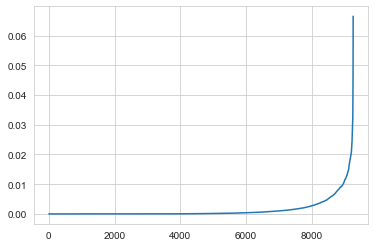

In [51]:
distances = get_distances_and_plot(df_business_dropped_dbscan)

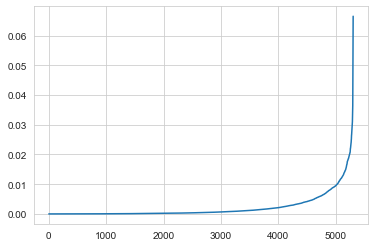

In [52]:
distances = remove_duplicates(distances)

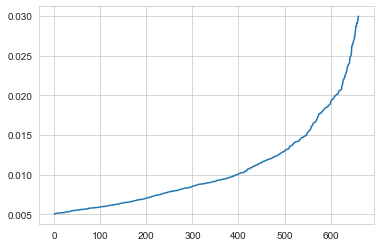

In [53]:
distances = filter_distances_and_plot(distances, 0.03, 0.005);

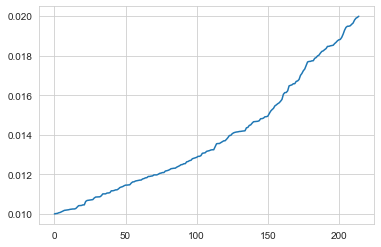

In [54]:
distances = filter_distances_and_plot(distances, 0.020, 0.010);

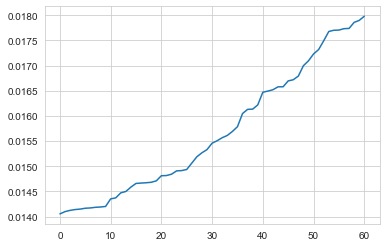

In [55]:
distances = filter_distances_and_plot(distances, 0.018, 0.014);

In [56]:
df_eps_dbscan = score_plot_and_get_best(df_business_dropped_dbscan, "dbscan", distances)

          silhouette_score  calinski_harabasz_score  davies_bouldin_score
eps                                                                      
0.014054         -0.419594                 3.456824              1.180245
0.014099         -0.419594                 3.456824              1.180245
0.014124         -0.419594                 3.456824              1.180245
0.014141         -0.419594                 3.456824              1.180245
0.014150         -0.419594                 3.456824              1.180245
...                    ...                      ...                   ...
0.017732         -0.419594                 3.456824              1.180245
0.017737         -0.419594                 3.456824              1.180245
0.017857         -0.419594                 3.456824              1.180245
0.017896         -0.419594                 3.456824              1.180245
0.017979         -0.419594                 3.456824              1.180245

[61 rows x 3 columns]
Best eps:  0.01

In [57]:
df_business_merged_dropped_dbscan = add_new_column('dbscan', df_eps_dbscan, df_business_dropped_dbscan)

### Reset index

In [58]:
df_business_merged_dropped_dbscan = df_business_merged_dropped_dbscan.reset_index(drop=True)
df_business_filtered = df_business_filtered.reset_index(drop=True)

### Re-integrate dropped features

In [59]:
df_business_filtered_dropped_merged_dbscan = df_business_merged_dropped_dbscan.join(df_business_filtered[to_drop])
print(df_business_filtered_dropped_merged_dbscan.shape)
df_business_filtered_dropped_merged_dbscan.head(5)

(9262, 67)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,cluster,business_id,address,categories,city,latitude,longitude,name,state,postal_code
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,tUFrWirKiKi_TAnsVWINQQ,5255 E Broadway Blvd,"Department Stores, Shopping, Fashion, Home & G...",Tucson,32.223236,-110.880452,Target,AZ,85711
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,rBmpy_Y1UbBx8ggHlyb7hA,625 N Stone Ave,"Automotive, Auto Parts & Supplies, Auto Custom...",Tucson,32.229872,-110.972342,Arizona Truck Outfitters,AZ,85705
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,wghnIlMb_i5U46HMBGx9ig,"1625 W Valencia Rd, Ste 101-103","Restaurants, Chinese",Tucson,32.132305,-110.999985,China Dragon Restaurant,AZ,85746
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,txyXRytGjwOXvS8s4sc-WA,1070 E Tucson Marketplace Blvd,"Vitamins & Supplements, Ice Cream & Frozen Yog...",Tucson,32.186794,-110.954765,Smoothie King,AZ,85713
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,eYxGFkxo6m3SYGVTh5m2nQ,4158 E Grant Rd,"Towing, Hotels & Travel, Automotive, Motorcycl...",Tucson,32.250324,-110.903655,Big Boyz Toyz Motorcycle Rentals,AZ,85712


### Export clustered with dbscan df


In [60]:
df_business_filtered_dropped_merged_dbscan.to_csv(
    r'/Users/at181903/PycharmProjects/IAproject/dataset/df_business_filtered_by_city_dbscan.csv', index=False)